In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import functools
from templatematching.preprocessing import *
from scipy.integrate import dblquad

PATH_TO_SAVE = '../img_normalized/'

# Sample

## Select image

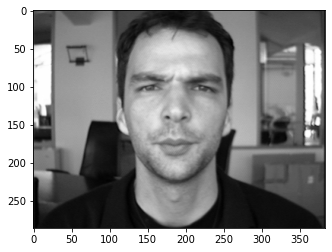

In [2]:
image_no = 1

# get image
image = plt.imread('../images/BioID_{0:04}.pgm'.format(image_no))
plt.imshow(image, cmap='gray')

## Mask creation (optional)

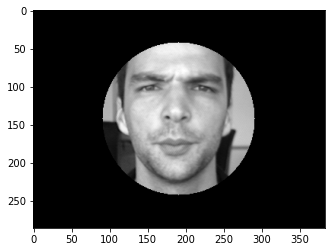

In [3]:
mask = mask_img(image, r= 100)
plt.imshow(mask * image, cmap='gray')

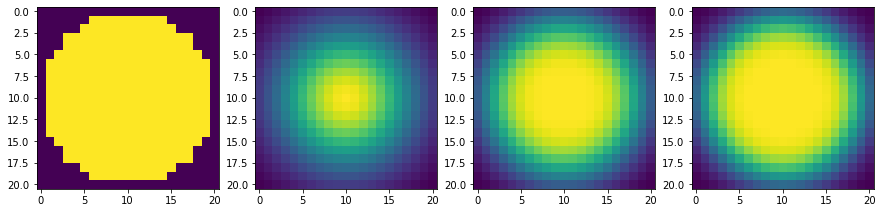

In [4]:
r = 10

X = np.linspace(-r, r, 2 * r + 1)
Y = np.linspace(-r, r, 2 * r + 1)
x, y = np.meshgrid(X, Y)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(15, 10))

disk_window = np.sqrt(x ** 2 + y ** 2) < r
ax1.imshow(disk_window)


n_order = 1
m_function_part = functools.partial(m_function, r=r, n_order=n_order)
# Compute normilizing constante
eta = dblquad(m_function_part, - np.inf, np.inf, -np.inf, np.inf)[0]
window = m_function(y, x, r=r, n_order=n_order) / eta
ax2.imshow(window)


n_order = 3
m_function_part = functools.partial(m_function, r=r, n_order=n_order)
# Compute normilizing constante
eta = dblquad(m_function_part, - np.inf, np.inf, -np.inf, np.inf)[0]
window_3 = m_function(y, x, r=r, n_order=n_order) / eta
ax3.imshow(window_3)


n_order = 5
m_function_part = functools.partial(m_function, r=r, n_order=n_order)
# Compute normilizing constante
eta = dblquad(m_function_part, - np.inf, np.inf, -np.inf, np.inf)[0]
window_5 = m_function(y, x, r=r, n_order=n_order) / eta
ax4.imshow(window_5)




## Normalize image

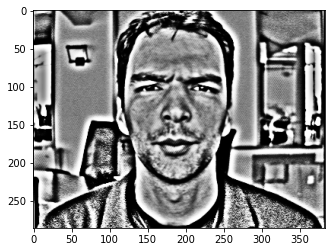

In [5]:
# No cropping here
mask = np.ones((image.shape[0], image.shape[1]))
plt.imshow(normalize_img(image, window, mask), cmap='gray')

# Loop over all images

In [7]:
import os
num_images = 1251

if not os.path.exists(PATH_TO_SAVE):
    os.makedirs(PATH_TO_SAVE)
    
for image_no in range(num_images):

    image = plt.imread('../images/BioID_{0:04}.pgm'.format(image_no))

    img_normalized = normalize_img(image, window, mask)
    
    plt.imsave(PATH_TO_SAVE + 'img_norm_{0:04}.jpg'.format(image_no), img_normalized, cmap='gray')